In [2]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [3]:
target.head()

0        donated
1        donated
2        donated
3        donated
4    not donated
Name: Class, dtype: object

In [4]:
target.unique()

array(['donated', 'not donated'], dtype=object)

In [5]:
target.value_counts(normalize=True)

Class
not donated    0.762032
donated        0.237968
Name: proportion, dtype: float64

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy = DummyClassifier(strategy="most_frequent")
scores = cross_val_score(dummy, data, target, cv=10)
scores.mean()

0.762054054054054

In [1]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy = DummyClassifier(strategy="most_frequent")
scores = cross_val_score(dummy, data, target, cv=10)
scores.mean()

NameError: name 'data' is not defined

In [ ]:
dummy = DummyClassifier(strategy="most_frequent")
scores = cross_val_score(
    dummy, data, target, cv=10, scoring="balanced_accuracy"
)
scores.mean()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), KNeighborsClassifier())
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [9]:
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=1))

cv_results = cross_validate(
    model, data, target, cv=10, scoring="balanced_accuracy",
    return_train_score=True,
)
cv_results = pd.DataFrame(cv_results)
cv_results[["train_score", "test_score"]].mean()

train_score    0.882552
test_score     0.483987
dtype: float64

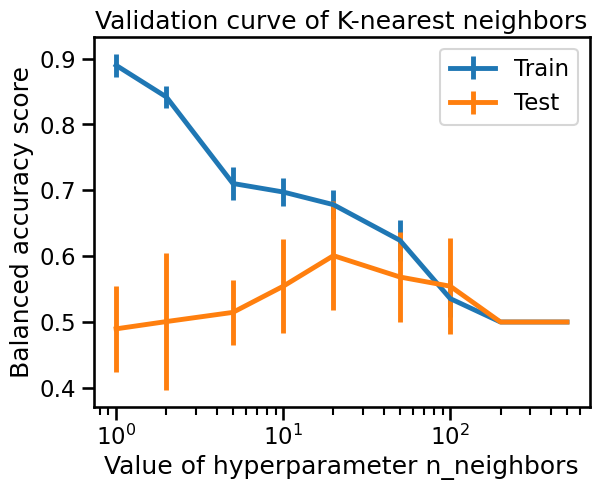

In [11]:
import numpy as np
from sklearn.model_selection import ValidationCurveDisplay

param_range = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

disp = ValidationCurveDisplay.from_estimator(
    model,
    data,
    target,
    param_name="kneighborsclassifier__n_neighbors",
    param_range=param_range,
    scoring="balanced_accuracy",
    std_display_style="errorbar",
    n_jobs=2,
)

_ = disp.ax_.set(
    xlabel="Value of hyperparameter n_neighbors",
    ylabel="Balanced accuracy score",
    title="Validation curve of K-nearest neighbors",
)